In [14]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import datetime
from os.path import isfile
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator

In [15]:
def get_url_resp(country="Worldwide"):
    base_url = "https://www.worldometers.info/coronavirus/"
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:74.0) Gecko/20100101 Firefox/74.0"}
    if country =="Worldwide":
        url = base_url
    else:
        url =base_url+"country/"+country+"/"
    response = requests.get(url, headers = headers)
    html = response.text
    return BeautifulSoup(html,"html.parser")

def format_case_numbers(soup,country="Worldwide"):
    if country == "Worldwide":
        soup_selector = soup.select(".col-md-6")
        val = [soup_selector[2].find_all(type="text/javascript")[0],soup_selector[3].find_all(type="text/javascript")[0]]
    else:
        soup_selector = soup.find_all("script")
        new_soup =[]
        for i in range(len(soup_selector)):
            if 'categories' in str(soup_selector[i]):
                new_soup.append(soup_selector[i])
        val = new_soup#[:2]
    return val

def get_right_element(val,Status = "Cases"):
    string1 = f"'Total Coronavirus {Status}'"
    new_soup =[]
    for i in range(len(val)):
        if string1 in str(val[i]):
            new_soup.append(val[i])
    return new_soup

def get_both_elements(val):#,country="Worldwide"):
    # if country=="Worldwide":
    #     return val
    # else:
    statuses_tuple = ("Cases","Deaths")
    new_soup = []
    for sta in statuses_tuple:
        new_soup.append(get_right_element(val,sta))
    return new_soup

def get_case_numbers_from_soup(val):#,country="Worldwide",status="Cases"):
    #dates = val.get_text().rsplit("categories",1)[1].split("[")[1].split("]")[0]
    dates = val.get_text().rsplit("categories")[1].split("[")[1].split("]")[0]
    case_num = val.get_text().rsplit("data")[1].split("[")[1].split("]")[0]
    case_num_formatted=case_num.split(',')
    dates_formatted=dates.split(',')
    case_num_lst=[]
    date_lst = []
    # for lst in case_num_lst,date_lst:
    #     lst.append(country)
    #     lst.append(status)

    for i in range(len(case_num_formatted)):
        if case_num_formatted[i] == "null":
            case_num_input = 0
        else:
            case_num_input = int(case_num_formatted[i])
        case_num_lst.append(case_num_input)

    for i in dates_formatted:
        date_lst.append(i.replace('"',''))
    return zip(date_lst,case_num_lst)

def get_case_dictionary(country="Worldwide"):#,status="Cases"):
    soup = get_url_resp(country)
    new_soup1 = format_case_numbers(soup,country)
    val = get_both_elements(new_soup1)
    statuses_tuple = ("Cases","Deaths")
    statuses = {
        "Cases":0,
        "Deaths":1,
    }
    lst=[]
    for sta in statuses_tuple:
        lst.append(dict(get_case_numbers_from_soup(val[statuses[sta]][0])))
    return lst
    #return dict(get_case_numbers_from_soup(val[statuses[status]]))#,country,status)
    # return get_case_numbers_from_soup(val[statuses[status]],country,status)


In [23]:
Countries = ("Worldwide","China","US","Italy","Spain","Germany","France","UK","India","South-Korea","Iran","Netherlands","Belgium","Switzerland","Turkey","Sweden","Indonesia","Portugal")
statuses_tuple = ("Cases","Deaths")
lst=[[],[]]
for country in Countries:
    for sta in statuses_tuple:
        lst[0].append(country)
        lst[1].append(sta)
### WORKS TO HERE ###
# lst = [["Worldwide","US"],["Cases","Cases"]]

data=[]
for country in Countries:
    country_data=get_case_dictionary(country=country)
    data.extend(country_data)
print(data)

 28': 63, 'Feb 29': 68, 'Mar 01': 75, 'Mar 02': 100, 'Mar 03': 124, 'Mar 04': 158, 'Mar 05': 221, 'Mar 06': 319, 'Mar 07': 435, 'Mar 08': 541, 'Mar 09': 704, 'Mar 10': 994, 'Mar 11': 1301, 'Mar 12': 1630, 'Mar 13': 2183, 'Mar 14': 2770, 'Mar 15': 3613, 'Mar 16': 4596, 'Mar 17': 6344, 'Mar 18': 9197, 'Mar 19': 13779, 'Mar 20': 19367, 'Mar 21': 24192, 'Mar 22': 33592, 'Mar 23': 43781, 'Mar 24': 54856, 'Mar 25': 68211, 'Mar 26': 85435, 'Mar 27': 104126, 'Mar 28': 123578, 'Mar 29': 142047}, {'Feb 15': 0, 'Feb 16': 0, 'Feb 17': 0, 'Feb 18': 0, 'Feb 19': 0, 'Feb 20': 0, 'Feb 21': 0, 'Feb 22': 0, 'Feb 23': 0, 'Feb 24': 0, 'Feb 25': 0, 'Feb 26': 0, 'Feb 27': 0, 'Feb 28': 0, 'Feb 29': 1, 'Mar 01': 1, 'Mar 02': 6, 'Mar 03': 9, 'Mar 04': 11, 'Mar 05': 12, 'Mar 06': 15, 'Mar 07': 19, 'Mar 08': 22, 'Mar 09': 26, 'Mar 10': 30, 'Mar 11': 38, 'Mar 12': 41, 'Mar 13': 48, 'Mar 14': 57, 'Mar 15': 69, 'Mar 16': 87, 'Mar 17': 110, 'Mar 18': 150, 'Mar 19': 206, 'Mar 20': 255, 'Mar 21': 301, 'Mar 22': 414, '

In [24]:
tuples = list(zip(*lst))
index = pd.MultiIndex.from_tuples(tuples)
cols = list(data[0].keys())

In [25]:
df = pd.DataFrame(data=data,index=index,dtype=pd.Int64Dtype())
df

Jan 22  Jan 23  Jan 24  Jan 25  Jan 26  Jan 27  Jan 28  \
Worldwide   Cases      580     845    1317    2015    2800    4581    6058   
            Deaths      17      25      41      56      80     106     132   
China       Cases      571     830    1287    1975    2744    4515    5974   
            Deaths      17      25      41      56      80     106     132   
US          Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Italy       Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Spain       Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Germany     Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
France      Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
UK          Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
India       Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
South-Korea Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Iran        Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Netherlands Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Belgium     Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Switzerland Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Turkey      Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Sweden      Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Indonesia   Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
Portugal    Cases     <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   
            Deaths    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>    <NA>   

                    Jan 29  Jan 30  Jan 31  ...  Mar 20  Mar 21  Mar 22  \
Worldwide   Cases     7813    9823   11950  ...  275550  304979  337459   
            Deaths     170     213     259  ...   11386   13011   14640   
China       Cases     7711    9692   11791  ...   81008   81054   81093   
            Deaths     170     213     259  ...    3255    3261    3270   
US          Cases     <NA>    <NA>    <NA>  ...   19367   24192   33592   
            Deaths    <NA>    <NA>    <NA>  ...     255     301     414   
Italy       Cases     <NA>    <NA>    <NA>  ...   47021   53578   59138   
            Deaths    <NA>    <NA>    <NA>  ...    4032    4825    5476   
Spain       Cases     <NA>    <NA>    <NA>  ...   21571   25496   28768   
            Deaths    <NA>    <NA>    <NA>  ...    1093    1381    1772   
Germany     Cases     <NA>    <NA>    <NA>  ...   19848   22364   24873   
            Deaths    <NA>    <NA>    <NA>  ...      68      84      94   
France      Cases     <NA>    <NA>    <NA>  ...   12612   14459   16018   
            Deaths    <NA>    <NA>    <NA>  ...     450     562     674   
UK      

In [29]:
df.xs('Deaths',level=1)

,Jan 22,Jan 23,Jan 24,Jan 25,Jan 26,Jan 27,Jan 28,Jan 29,Jan 30,Jan 31,...,Mar 20,Mar 21,Mar 22,Mar 23,Mar 24,Mar 25,Mar 26,Mar 27,Mar 28,Mar 29
Worldwide,17,25,41,56,80,106,132,170,213,259,...,11386,13011,14640,16513,18894,21282,24073,27343,30861,33966
China,17,25,41,56,80,106,132,170,213,259,...,3255,3261,3270,3277,3281,3287,3292,3295,3300,3300
US,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,255,301,414,555,780,1027,1295,1695,2220,2484
Italy,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,4032,4825,5476,6077,6820,7503,8215,9134,10023,10779
Spain,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,1093,1381,1772,2311,2991,3647,4365,5138,5982,6803
Germany,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,68,84,94,123,159,206,267,351,433,541
France,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,450,562,674,860,1100,1331,1696,1995,2314,2606
UK,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,177,233,281,335,422,463,578,759,1019,1228
India,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,5,5,7,10,10,12,20,20,24,27
South-Korea,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,94,102,104,111,120,126,131,139,144,152


In [33]:
df.xs('Deaths',level=1)[df.columns[-14:]]

,Mar 16,Mar 17,Mar 18,Mar 19,Mar 20,Mar 21,Mar 22,Mar 23,Mar 24,Mar 25,Mar 26,Mar 27,Mar 28,Mar 29
Worldwide,7162,7979,8951,10030,11386,13011,14640,16513,18894,21282,24073,27343,30861,33966
China,3226,3237,3245,3248,3255,3261,3270,3277,3281,3287,3292,3295,3300,3300
US,87,110,150,206,255,301,414,555,780,1027,1295,1695,2220,2484
Italy,2158,2503,2978,3405,4032,4825,5476,6077,6820,7503,8215,9134,10023,10779
Spain,342,533,638,831,1093,1381,1772,2311,2991,3647,4365,5138,5982,6803
Germany,17,26,28,44,68,84,94,123,159,206,267,351,433,541
France,148,175,264,372,450,562,674,860,1100,1331,1696,1995,2314,2606
UK,55,71,104,144,177,233,281,335,422,463,578,759,1019,1228
India,2,3,3,4,5,5,7,10,10,12,20,20,24,27
South-Korea,75,81,84,91,94,102,104,111,120,126,131,139,144,152


In [42]:
def squeeze_nan(x, hold):
    if x.name not in hold:
        original_columns = x.index.tolist()

        squeezed = x.dropna()
        squeezed.index = [original_columns[n] for n in range(squeezed.count())]

        return squeezed.reindex(original_columns, fill_value=np.nan)
    else:
        return x

filter_num = 300
# start_num =300
days = 20
df1 = df.xs('Deaths',level = 1).fillna(0)
df1
# df.xs('Deaths',level=1).apply(lambda x: x.shift(-1), axis=1)
df2 = df1[df1>filter_num]
df2
df3 = df2.apply(lambda x: squeeze_nan(x, ['B']), axis=1)
df3.columns=[f"Day {day+1}" for day in range(len(df3.columns.values.tolist()))]
df4_1 = df3[df3.columns[0:days]].dropna(how='all').astype('Int64').drop('Worldwide').drop('China').drop('Iran').drop('Belgium').drop('Germany').drop('Netherlands')
df4 = df4_1.sort_values(by=df4_1.columns.values.tolist()[::-1],ascending=True)
df4

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,Day 11,Day 12,Day 13,Day 14,Day 15,Day 16,Day 17,Day 18,Day 19,Day 20
Italy,366,463,631,827,1016,1266,1441,1809,2158,2503,2978,3405,4032,4825,5476,6077,6820,7503,8215,9134
Spain,342,533,638,831,1093,1381,1772,2311,2991,3647,4365,5138,5982,6803,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
France,372,450,562,674,860,1100,1331,1696,1995,2314,2606,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
US,301,414,555,780,1027,1295,1695,2220,2484,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
UK,335,422,463,578,759,1019,1228,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


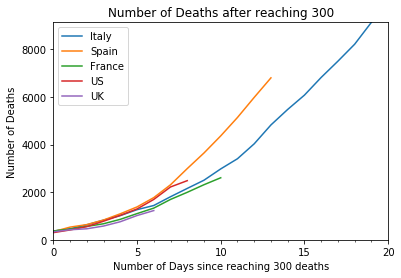

In [43]:
for country in df4.T.columns.values.tolist():
    line = df4.T[country].dropna().plot()
line.legend()
line.set_ylim((0,max(df4.max())))
line.set_xlim((0,days))
line.set_ylabel('Number of Deaths')
line.set_xlabel(f'Number of Days since reaching {filter_num} deaths')
line.set_title(f'Number of Deaths after reaching {filter_num}')
# line.annotate('Italy in lockdown',xy=(3,500),xytext=(3, 4000),
#                 arrowprops=dict(facecolor='black', shrink=0.05),)
line.xaxis.set_major_locator(MultipleLocator(5))
line.xaxis.set_major_formatter(FormatStrFormatter('%d'))
line.xaxis.set_minor_locator(MultipleLocator(1))